<a href="https://colab.research.google.com/github/amiwidyas/tugas/blob/main/Salinan_dari_Project_Akhir_Kel_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROJECT AKHIR**

Kelompok 3 - **BETVICE FOOD & DRINK 4.0 SEBAGAI OPTIMASI REKOMENDASI PENJUALAN DAPUREYI MENGGUNAKAN METODE MARKET BASKET ANALYSIS**

Nama Web App : **Betvice Food & Drink 4.0**

Nama Anggota:
1. Ade Firmansyah (Chief Executive Officer) 
2. Khadafy Rafsanjani (IT Strategy & Planning)
3. Farah Tatania (IT Applic, & Development) 
4. Ayu Susanti (IT Network & Infrastr) 
5. Ami Widyastutik (IT Operation)

## **1. Import Library**

In [ ]:
#import library yang akan digunakan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## **2. Import Dataset**

In [ ]:
#import data dan membaca data
df = pd.read_csv('/content/bread basket.csv')
df

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend
...,...,...,...,...,...
20502,9682,Coffee,09-04-2017 14:32,afternoon,weekend
20503,9682,Tea,09-04-2017 14:32,afternoon,weekend
20504,9683,Coffee,09-04-2017 14:57,afternoon,weekend
20505,9683,Pastry,09-04-2017 14:57,afternoon,weekend


## **3. Data Preparation**

In [ ]:
# cek tipe data dari setiap kolom
print('Dataset Information: \n')
print(df.info())

Dataset Information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB
None


In [ ]:
# mencetak 10 data pertama
print('First Ten Rows of the DataFrame: \n')
print(df.head(10))

First Ten Rows of the DataFrame: 

   Transaction           Item         date_time period_day weekday_weekend
0            1          Bread  30-10-2016 09:58    morning         weekend
1            2   Scandinavian  30-10-2016 10:05    morning         weekend
2            2   Scandinavian  30-10-2016 10:05    morning         weekend
3            3  Hot chocolate  30-10-2016 10:07    morning         weekend
4            3            Jam  30-10-2016 10:07    morning         weekend
5            3        Cookies  30-10-2016 10:07    morning         weekend
6            4         Muffin  30-10-2016 10:08    morning         weekend
7            5         Coffee  30-10-2016 10:13    morning         weekend
8            5         Pastry  30-10-2016 10:13    morning         weekend
9            5          Bread  30-10-2016 10:13    morning         weekend


In [ ]:
#Mencetak data item yang unik (memiliki nilai item berbeda)
print('Unique Items: ', df['Item'].nunique())
print( '\n', df['Item'].unique())

Unique Items:  94

 ['Bread' 'Scandinavian' 'Hot chocolate' 'Jam' 'Cookies' 'Muffin' 'Coffee'
 'Pastry' 'Medialuna' 'Tea' 'Tartine' 'Basket' 'Mineral water'
 'Farm House' 'Fudge' 'Juice' "Ella's Kitchen Pouches" 'Victorian Sponge'
 'Frittata' 'Hearty & Seasonal' 'Soup' 'Pick and Mix Bowls' 'Smoothies'
 'Cake' 'Mighty Protein' 'Chicken sand' 'Coke' 'My-5 Fruit Shoot'
 'Focaccia' 'Sandwich' 'Alfajores' 'Eggs' 'Brownie' 'Dulce de Leche'
 'Honey' 'The BART' 'Granola' 'Fairy Doors' 'Empanadas' 'Keeping It Local'
 'Art Tray' 'Bowl Nic Pitt' 'Bread Pudding' 'Adjustment' 'Truffles'
 'Chimichurri Oil' 'Bacon' 'Spread' 'Kids biscuit' 'Siblings'
 'Caramel bites' 'Jammie Dodgers' 'Tiffin' 'Olum & polenta' 'Polenta'
 'The Nomad' 'Hack the stack' 'Bakewell' 'Lemon and coconut' 'Toast'
 'Scone' 'Crepes' 'Vegan mincepie' 'Bare Popcorn' 'Muesli' 'Crisps'
 'Pintxos' 'Gingerbread syrup' 'Panatone' 'Brioche and salami'
 'Afternoon with the baker' 'Salad' 'Chicken Stew' 'Spanish Brunch'
 'Raspberry shortbr

In [ ]:
# Cek missing value dan zeros
print(df.isnull().sum().sort_values(ascending=False))

Transaction        0
Item               0
date_time          0
period_day         0
weekday_weekend    0
dtype: int64


In [ ]:
# cek nilai "NONE" pada kolom Item
print(df[df['Item']=='NONE'])

Empty DataFrame
Columns: [Transaction, Item, date_time, period_day, weekday_weekend]
Index: []


In [ ]:
# menghapus baris dengan nilai Item = None
df.drop(df[df['Item']=='NONE'].index, inplace=True)

In [ ]:
# cek perubahan yang terjadi
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 961.3+ KB
None


In [ ]:
# Year (ingat kembali penulisan function lambda)
df['Year'] = df['date_time'].apply(lambda x: x.split("-")[0])
# Month
df['Month'] = df['date_time'].apply(lambda x: x.split("-")[1])
# Day
df['Day'] = df['date_time'].apply(lambda x: x.split("-")[2])

In [ ]:
# cek kembali perubahan yang terjadi setelah nilai tahun, bulan dan hari ditampung di fitur baru (year, month, day)
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20507 entries, 0 to 20506
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
 5   Year             20507 non-null  object
 6   Month            20507 non-null  object
 7   Day              20507 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.4+ MB
None
   Transaction           Item         date_time period_day weekday_weekend  \
0            1          Bread  30-10-2016 09:58    morning         weekend   
1            2   Scandinavian  30-10-2016 10:05    morning         weekend   
2            2   Scandinavian  30-10-2016 10:05    morning         weekend   
3            3  Hot chocolate  30-10-2016 10:07    morning         weekend 

## **4. Visualisasi dan Memahami Data**

In [ ]:
# Mencetak 20 data penjualan item terbanyak
most_sold = df['Item'].value_counts().head(20)

print('Most Sold Items: \n')
print(most_sold)

Most Sold Items: 

Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Brownie           379
Farm House        374
Muffin            370
Alfajores         369
Juice             369
Soup              342
Scone             327
Toast             318
Scandinavian      277
Truffles          193
Coke              185
Name: Item, dtype: int64


In [ ]:
transaction_count = df.groupby(by='Item')[['Transaction']].count().sort_values(by='Transaction', ascending=False)
def convert_to_percentage(x):
    return 100 * x / float(x.sum())

transaction_percentage = transaction_count.apply(convert_to_percentage)
transaction_percentage.head()

,Transaction
Item,
Coffee,26.678695
Bread,16.213976
Tea,6.997611
Cake,4.998293
Pastry,4.174184


Text(0.5, 1.0, 'Items Most Sold')

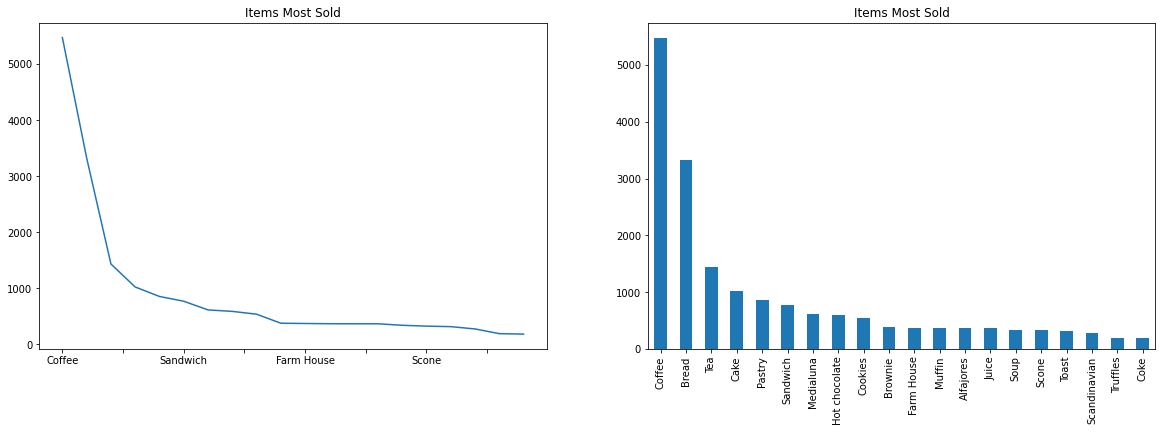

In [ ]:
# visualisasikan data penjualan item terbanyak ke line chart dan bar chart
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
#plt.plot(most_sold)
most_sold.plot(kind='line')
plt.title('Items Most Sold')


plt.subplot(1,2,2)
most_sold.plot(kind='bar')
plt.title('Items Most Sold')

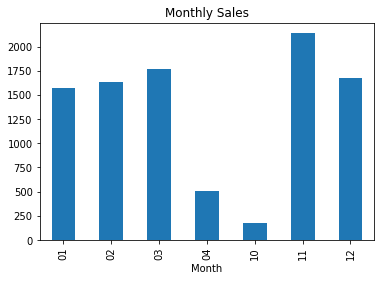

In [ ]:
#melihat visualisasi data penjualan perbulan
df.groupby('Month')['Transaction'].nunique().plot(kind='bar', title='Monthly Sales')
plt.show()

In [ ]:
print(df.groupby('Month')['Day'].nunique())

Month
01    502
02    557
03    537
04    344
10    151
11    581
12    524
Name: Day, dtype: int64


## **5. Market Basket Analysis**

In [ ]:
#Ubah item list menjadi data transaksi dengan menggunakan TransactionEncoder. Kita akan menggunakan frequent item-sets untuk menghasilkan aturan asosiasi dengan menggunakan algoritma Apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules, apriori

In [ ]:
transaction_list = []

# For loop to create a list of the unique transactions throughout the dataset:
for i in df['Transaction'].unique():
    tlist = list(set(df[df['Transaction']==i]['Item']))
    if len(tlist)>0:
        transaction_list.append(tlist)
print(len(transaction_list))

9465


In [ ]:
transaction_list

[['Bread'],
 ['Scandinavian'],
 ['Hot chocolate', 'Cookies', 'Jam'],
 ['Muffin'],
 ['Coffee', 'Pastry', 'Bread'],
 ['Muffin', 'Medialuna', 'Pastry'],
 ['Coffee', 'Tea', 'Medialuna', 'Pastry'],
 ['Pastry', 'Bread'],
 ['Muffin', 'Bread'],
 ['Scandinavian', 'Medialuna'],
 ['Medialuna', 'Bread'],
 ['Jam', 'Tea', 'Tartine', 'Coffee', 'Pastry'],
 ['Coffee', 'Basket', 'Bread'],
 ['Medialuna', 'Bread', 'Pastry'],
 ['Scandinavian', 'Mineral water'],
 ['Medialuna', 'Coffee', 'Bread'],
 ['Hot chocolate'],
 ['Farm House'],
 ['Farm House', 'Bread'],
 ['Medialuna', 'Bread'],
 ['Medialuna', 'Coffee', 'Bread'],
 ['Jam'],
 ['Muffin', 'Scandinavian'],
 ['Bread'],
 ['Scandinavian'],
 ['Fudge'],
 ['Scandinavian'],
 ['Coffee', 'Bread'],
 ['Bread', 'Jam'],
 ['Bread'],
 ['Basket'],
 ['Muffin', 'Scandinavian'],
 ['Coffee'],
 ['Muffin', 'Coffee'],
 ['Muffin', 'Scandinavian'],
 ['Tea', 'Bread'],
 ['Coffee', 'Bread'],
 ['Tea', 'Bread'],
 ['Scandinavian'],
 ['Muffin', 'Juice', 'Tartine', 'Coffee'],
 ['Scandinavia

In [ ]:
te = TransactionEncoder()
te_ary = te.fit(transaction_list).transform(transaction_list)
df2 = pd.DataFrame(te_ary, columns=te.columns_)

In [ ]:
frequent_itemsets = apriori(df2, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)
metrix = pd.DataFrame(rules)
metrix[['antecedents','consequents', 'support', 'confidence', 'lift']].sort_values('lift', ascending=False)

,antecedents,consequents,support,confidence,lift
41,(Cake),"(Tea, Coffee)",0.010037,0.096643,1.937977
38,"(Tea, Coffee)",(Cake),0.010037,0.201271,1.937977
9,(Cake),(Hot chocolate),0.011410,0.109868,1.883874
8,(Hot chocolate),(Cake),0.011410,0.195652,1.883874
10,(Tea),(Cake),0.023772,0.166667,1.604781
11,(Cake),(Tea),0.023772,0.228891,1.604781
31,(Coffee),(Toast),0.023666,0.049470,1.472431
30,(Toast),(Coffee),0.023666,0.704403,1.472431
37,(Pastry),"(Coffee, Bread)",0.011199,0.130061,1.444872
36,"(Coffee, Bread)",(Pastry),0.011199,0.124413,1.444872


In [ ]:
df2

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9460,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9461,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
9462,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9463,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
#use this to check date format
df[df['Item'].str.contains('Coffee')]

,Transaction,Item,date_time,period_day,weekday_weekend,Year,Month,Day
7,5,Coffee,30-10-2016 10:13,morning,weekend,30,10,2016 10:13
15,7,Coffee,30-10-2016 10:19,morning,weekend,30,10,2016 10:19
27,12,Coffee,30-10-2016 10:30,morning,weekend,30,10,2016 10:30
33,13,Coffee,30-10-2016 10:31,morning,weekend,30,10,2016 10:31
41,16,Coffee,30-10-2016 10:37,morning,weekend,30,10,2016 10:37
...,...,...,...,...,...,...,...,...
20483,9673,Coffee,09-04-2017 12:32,afternoon,weekend,09,04,2017 12:32
20485,9674,Coffee,09-04-2017 13:04,afternoon,weekend,09,04,2017 13:04
20490,9678,Coffee,09-04-2017 13:49,afternoon,weekend,09,04,2017 13:49
20502,9682,Coffee,09-04-2017 14:32,afternoon,weekend,09,04,2017 14:32


In [ ]:
#use this to check date format
df[df['Item'].str.contains('Toast')]

,Transaction,Item,date_time,period_day,weekday_weekend,Year,Month,Day
4932,2445,Toast,02-12-2016 11:22,morning,weekday,02,12,2016 11:22
5165,2569,Toast,03-12-2016 15:48,afternoon,weekend,03,12,2016 15:48
5189,2580,Toast,04-12-2016 10:14,morning,weekend,04,12,2016 10:14
5192,2581,Toast,04-12-2016 10:33,morning,weekend,04,12,2016 10:33
5201,2584,Toast,04-12-2016 10:52,morning,weekend,04,12,2016 10:52
...,...,...,...,...,...,...,...,...
20177,9524,Toast,07-04-2017 12:31,afternoon,weekday,07,04,2017 12:31
20179,9525,Toast,07-04-2017 12:32,afternoon,weekday,07,04,2017 12:32
20406,9627,Toast,08-04-2017 16:05,afternoon,weekend,08,04,2017 16:05
20455,9656,Toast,09-04-2017 11:17,morning,weekend,09,04,2017 11:17


In [ ]:
#use this to check date format
df[df['Item'].str.contains('Hot chocolate')]

,Transaction,Item,date_time,period_day,weekday_weekend,Year,Month,Day
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend,30,10,2016 10:07
42,17,Hot chocolate,30-10-2016 10:38,morning,weekend,30,10,2016 10:38
91,45,Hot chocolate,30-10-2016 12:08,afternoon,weekend,30,10,2016 12:08
116,58,Hot chocolate,30-10-2016 12:59,afternoon,weekend,30,10,2016 12:59
338,159,Hot chocolate,31-10-2016 14:22,afternoon,weekday,31,10,2016 14:22
...,...,...,...,...,...,...,...,...
19965,9428,Hot chocolate,05-04-2017 14:44,afternoon,weekday,05,04,2017 14:44
20245,9559,Hot chocolate,08-04-2017 09:10,morning,weekend,08,04,2017 09:10
20402,9627,Hot chocolate,08-04-2017 16:05,afternoon,weekend,08,04,2017 16:05
20438,9649,Hot chocolate,09-04-2017 09:29,morning,weekend,09,04,2017 09:29


In [ ]:
#use this to check date format
df[df['Item'].str.contains('Cake')]

,Transaction,Item,date_time,period_day,weekday_weekend,Year,Month,Day
132,64,Cake,30-10-2016 13:34,afternoon,weekend,30,10,2016 13:34
171,81,Cake,31-10-2016 08:28,morning,weekday,31,10,2016 08:28
222,105,Cake,31-10-2016 10:21,morning,weekday,31,10,2016 10:21
238,113,Cake,31-10-2016 11:02,morning,weekday,31,10,2016 11:02
243,117,Cake,31-10-2016 11:13,morning,weekday,31,10,2016 11:13
...,...,...,...,...,...,...,...,...
20415,9631,Cake,08-04-2017 16:24,afternoon,weekend,08,04,2017 16:24
20429,9636,Cake,08-04-2017 16:40,afternoon,weekend,08,04,2017 16:40
20440,9649,Cake,09-04-2017 09:29,morning,weekend,09,04,2017 09:29
20449,9653,Cake,09-04-2017 10:39,morning,weekend,09,04,2017 10:39


In [ ]:
#use this to check date format
df[df['Item'].str.contains('Tea')]

,Transaction,Item,date_time,period_day,weekday_weekend,Year,Month,Day
16,7,Tea,30-10-2016 10:19,morning,weekend,30,10,2016 10:19
30,12,Tea,30-10-2016 10:30,morning,weekend,30,10,2016 10:30
72,36,Tea,30-10-2016 11:33,morning,weekend,30,10,2016 11:33
77,38,Tea,30-10-2016 11:42,morning,weekend,30,10,2016 11:42
85,42,Tea,30-10-2016 11:57,morning,weekend,30,10,2016 11:57
...,...,...,...,...,...,...,...,...
20453,9655,Tea,09-04-2017 11:14,morning,weekend,09,04,2017 11:14
20460,9659,Tea,09-04-2017 11:31,morning,weekend,09,04,2017 11:31
20474,9668,Tea,09-04-2017 12:07,afternoon,weekend,09,04,2017 12:07
20497,9681,Tea,09-04-2017 14:30,afternoon,weekend,09,04,2017 14:30


In [ ]:
#use this to check date format
df[df['Item'].str.contains('Pastry')]

,Transaction,Item,date_time,period_day,weekday_weekend,Year,Month,Day
8,5,Pastry,30-10-2016 10:13,morning,weekend,30,10,2016 10:13
11,6,Pastry,30-10-2016 10:16,morning,weekend,30,10,2016 10:16
14,7,Pastry,30-10-2016 10:19,morning,weekend,30,10,2016 10:19
17,8,Pastry,30-10-2016 10:20,morning,weekend,30,10,2016 10:20
29,12,Pastry,30-10-2016 10:30,morning,weekend,30,10,2016 10:30
...,...,...,...,...,...,...,...,...
20302,9582,Pastry,08-04-2017 10:51,morning,weekend,08,04,2017 10:51
20309,9585,Pastry,08-04-2017 11:07,morning,weekend,08,04,2017 11:07
20443,9650,Pastry,09-04-2017 10:03,morning,weekend,09,04,2017 10:03
20445,9651,Pastry,09-04-2017 10:08,morning,weekend,09,04,2017 10:08


In [ ]:
#use this to check date format
df[df['Item'].str.contains('Bread')]

,Transaction,Item,date_time,period_day,weekday_weekend,Year,Month,Day
0,1,Bread,30-10-2016 09:58,morning,weekend,30,10,2016 09:58
9,5,Bread,30-10-2016 10:13,morning,weekend,30,10,2016 10:13
18,8,Bread,30-10-2016 10:20,morning,weekend,30,10,2016 10:20
19,9,Bread,30-10-2016 10:21,morning,weekend,30,10,2016 10:21
23,11,Bread,30-10-2016 10:27,morning,weekend,30,10,2016 10:27
...,...,...,...,...,...,...,...,...
20475,9668,Bread,09-04-2017 12:07,afternoon,weekend,09,04,2017 12:07
20478,9671,Bread,09-04-2017 12:28,afternoon,weekend,09,04,2017 12:28
20484,9673,Bread,09-04-2017 12:32,afternoon,weekend,09,04,2017 12:32
20493,9679,Bread,09-04-2017 14:08,afternoon,weekend,09,04,2017 14:08


In [ ]:
#use this to check date format
df[df['Item'].str.contains('Sandwich')]

,Transaction,Item,date_time,period_day,weekday_weekend,Year,Month,Day
309,146,Sandwich,31-10-2016 13:08,afternoon,weekday,31,10,2016 13:08
330,155,Sandwich,31-10-2016 14:01,afternoon,weekday,31,10,2016 14:01
351,167,Sandwich,31-10-2016 14:50,afternoon,weekday,31,10,2016 14:50
446,218,Sandwich,01-11-2016 12:37,afternoon,weekday,01,11,2016 12:37
461,227,Sandwich,01-11-2016 13:31,afternoon,weekday,01,11,2016 13:31
...,...,...,...,...,...,...,...,...
20386,9617,Sandwich,08-04-2017 15:03,afternoon,weekend,08,04,2017 15:03
20417,9632,Sandwich,08-04-2017 16:25,afternoon,weekend,08,04,2017 16:25
20472,9667,Sandwich,09-04-2017 12:04,afternoon,weekend,09,04,2017 12:04
20473,9667,Sandwich,09-04-2017 12:04,afternoon,weekend,09,04,2017 12:04


**KESIMPULAN**

Paket A = Coffee & Toast (Weekdays 08.00 - 17.00)

Paket B = Hot Chocolate & Cake (Weekdays - Weekend 13.00 - 17.00)

Paket C = Tea & Cake (Weekdays 08.00 - 12.00)

Paket D = Pastry & Coffee, Bread (Weekdays 08.00 - 17.00)

Paket E = Tea & Sandwich (Weekdays - Weekend 08.00 - 17.00)